## Homework 2: Wine Quality Prediction Using SGD
### Course: CS 474/574: Deep Learning/2022 Fall
### Due: 09/25/2022


Add your code to the following sections:

    ## add your code here
    #-----------------------

    #---------------------------------
    
Description: In this homework, you are going to practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments. (deduct 5 points for doing this)

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to optimize the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights

    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''

    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)

    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w

        w = w - lr*gradient
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1

    w_star = w
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (20 points)

In [35]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. (5 points)
# from sklearn.model_selection import train_test_split
# Use the normalized data X1 when we call the train_test_split function.

## add your code here
#-----------------------
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 2)
print(X_train.shape, X_test.shape)
#---------------------------------

(3428, 11) (1470, 11)


In [36]:
## 2.2 Model training using the training set and the GD function (5 points )
# Use a small learning rate (le-4) rather than the default learning rate when calling the default GD function.
## add your code here
#-----------------------
w_star, loss_hist, w_hist = GD(X_train, y_train, lr = 0.0001)
#---------------------------------

0 loss: 24378.22559211909
1 loss: 4954.646015655625
2 loss: 1868.801652949437
3 loss: 1375.662719844669
4 loss: 1294.0410201055256
5 loss: 1277.8034031781167
6 loss: 1272.0199268191277
7 loss: 1267.9714826245581
8 loss: 1264.2721879834235
9 loss: 1260.6999333274384
10 loss: 1257.2173553457483
11 loss: 1253.8164740041539
12 loss: 1250.494036054339
13 loss: 1247.2476002972153
14 loss: 1244.0749143994867
15 loss: 1240.9738141056969
16 loss: 1237.9422054088066
17 loss: 1234.9780599435553
18 loss: 1232.0794125344696
19 loss: 1229.2443591403335
20 loss: 1226.4710549143902
21 loss: 1223.757712334047
22 loss: 1221.1025993911267
23 loss: 1218.5040378396739
24 loss: 1215.9604014993183
25 loss: 1213.4701146124069
26 loss: 1211.0316502531948
27 loss: 1208.643528787442
28 loss: 1206.3043163808165
29 loss: 1204.0126235545586
30 loss: 1201.7671037868993
31 loss: 1199.5664521587944
32 loss: 1197.4094040425525
33 loss: 1195.294733832011
34 loss: 1193.2212537129315
35 loss: 1191.1878124723457
36 loss: 1

In [37]:
## 2.3. calculating mse&mae values on the training set and test set, respectively. (10 points)

#training error
## add your code here
#-----------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_pred_train = predict(X_train, w_star)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print('training mse: {} and training mae: {}'.format(mse_train, mae_train))
#---------------------------------


## test error
## add your code here
#-----------------------
y_pred_test = predict(X_test, w_star)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('test mse: {} and test mae: {}'.format(mse_test, mae_test))
#---------------------------------

training mse: 0.6475954346866688 and training mae: 0.6258677005587651
test mse: 0.6550138365060324 and test mae: 0.6282117253789045


### 3. SGD implementation (40 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [38]:
# Shuffle data

# Use the shuffle function in sklearn.utils to shuffle data. But you need to import it first: from sklearn.utils import shuffle;
# Use function np.random.permutation

def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach

        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches

        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = np.zeros((epoch, w.shape[0])) # (epoch,12)
    loss_hist = np.zeros(epoch)            # (epoch,)


    ## add your code here
    #-----------------------
    from sklearn.utils import shuffle


    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        X_shuffle, Y_shuffle = shuffle(X), shuffle(Y)

        #(2) go through all minibatches and update w. (30 points)
        for b in range(int(m/batch_size)):
            # prepare the b mininath X_batch and Y_batch. 10 points
            X_batch = X_shuffle[(batch_size * b):(batch_size * (b + 1))]
            Y_batch = Y_shuffle[(batch_size * b):(batch_size * (b + 1))]

            #prepare A_batch and b_batch. 10 points
            A_batch = np.c_[np.ones((batch_size, 1)), X_batch]
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0], 1])

            #gradient calcualation and w update. 10 points
            grad = A_batch.T.dot(np.dot(A_batch, w) - b_batch)
            w = w - (lr * grad)
            # print(i, b, X_batch.shape, A_batch.shape)

        ## (3) Save the loss and current weight for each epoch. 5 points
        w_hist[i, :] = w.T
        loss_hist[i] = loss(w, X, Y)
        # print(i, loss_hist[i])

        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------

    w_star = w
    return w_star, w_hist, loss_hist

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [39]:
batch_size = 32
n_epochs = 50

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

## add your code here
#-----------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points
y_pred_test = predict(X_test, w_star)

for i in range(10):
    print('pred. quality value = {}, true quality value = {}'.format(y_pred_test[i], y_test[i]))

#(2) mse and mae of the training set. 5 points
y_pred_train = predict(X_train, w_star)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print('training mse: {} and training mae: {}'.format(mse_train, mae_train))

#(3)mse and mae of the test set. 5 points
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('test mse: {} and test mae: {}'.format(mse_test, mae_test))
#---------------------------------

pred. quality value = 5.705264125985375, true quality value = 5.0
pred. quality value = 5.7045514979499, true quality value = 7.0
pred. quality value = 5.935775745402271, true quality value = 6.0
pred. quality value = 5.826778393576758, true quality value = 5.0
pred. quality value = 6.305169433676045, true quality value = 6.0
pred. quality value = 6.045380242497995, true quality value = 7.0
pred. quality value = 6.151213059301382, true quality value = 6.0
pred. quality value = 6.263263772082089, true quality value = 6.0
pred. quality value = 5.786968869666548, true quality value = 7.0
pred. quality value = 5.936212707875384, true quality value = 6.0
training mse: 0.6475954346866688 and training mae: 0.6258677005587651
test mse: 0.6550138365060324 and test mae: 0.6282117253789045


### 5. Plot the loss curve of the SGD. (5 points)

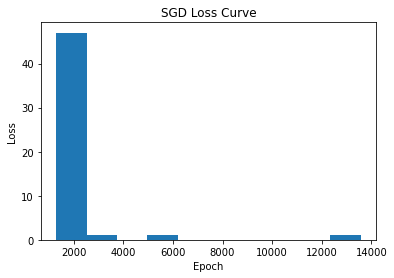

In [40]:
# Plot the values in loss_hist_SGD; and the horizontal axis is epoch.

## add your code here
#-----------------------
plt.hist(loss_hist_SGD)
plt.title('SGD Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
#---------------------------------

### 6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

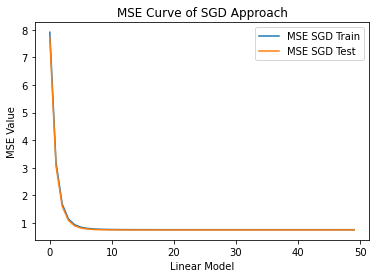

In [46]:
# Plot the MSE curves of the "SGD" approach
# each row in w_hist_SGD is one linear model
# apply each linear model to predict using the training and test sets
# calculate mse values for both training and test sets
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------
for row in range(len(w_hist_SGD)):
    y_pred_train = predict(X_train, w_hist_SGD[row])
    mse_SGD_train[row] = mean_squared_error(y_train, y_pred_train)
    y_pred_test = predict(X_test, w_hist_SGD[row])
    mse_SGD_test[row] = mean_squared_error(y_test, y_pred_test)

plt.plot(mse_SGD_train, label="MSE SGD Train")
plt.plot(mse_SGD_test, label="MSE SGD Test")
plt.title("MSE Curve of SGD Approach")
plt.xlabel('Linear Model')
plt.ylabel('MSE Value')
plt.legend()
plt.show()
#---------------------------------